# Python Example: Decision Trees and Depth Selection


The following Python code demonstrates how to use Decision Trees for time series forecasting, along with model selection using time series cross-validation. 
We will generate synthetic time series data, create lagged features, and use cross-validation (via `TimeSeriesSplit`) to determine the optimal number of leaves for the tree.


**Step 1: Import necessary libraries:** We import the required libraries for data manipulation, model building, and evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

**Step 2: Generate synthetic time series data:** We generate a simple sine wave with added noise, simulating a periodic time series.

In [2]:
# Generate synthetic time series data (sine wave with noise)
np.random.seed(0)
time = np.arange(0, 100, 0.1)
series = np.sin(time) + 0.1 * np.random.randn(len(time))

**Step 3: Create lagged features:** To predict future values, we need to create lagged features. This function builds a dataset where each input vector consists of past observations, and the corresponding label is the next value in the series.

In [3]:
# Create lagged features for time series
def create_lagged_features(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])  # Past `window_size` observations
        y.append(series[i + window_size])    # Next value in the series
    return np.array(X), np.array(y)

**Step 4: Set the window size for lagged features:** We define the number of past time steps to use as input features (e.g., 10).

In [4]:
# Set window size
window_size = 10
X, y = create_lagged_features(series, window_size)

**Step 5: Split the data into training and testing sets:** We divide the dataset into training and testing sets. Since the data is time-dependent, we use `shuffle=False` to ensure the temporal order is preserved.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Step 6: Time series cross-validation:** We use `TimeSeriesSplit` to perform cross-validation, which respects the sequential nature of the data.

In [6]:
# Use TimeSeriesSplit for cross-validation to avoid shuffling in time series data
tscv = TimeSeriesSplit(n_splits=5)

**Step 7: Model selection using cross-validation:** We iterate over different values of `max_depth` (which controls the depth of the tree) to identify the best model based on cross-validation performance.

In [7]:
# Perform model selection for max_depth (number of levels in the tree)
max_depth_values = list(range(2, 13))  # From 2 to 12 in increments of 1
best_depth = None
best_score = float("inf")

for max_depth in max_depth_values:
    tree = DecisionTreeRegressor(max_depth=max_depth)
    cv_scores = -cross_val_score(tree, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
    mean_cv_score = np.mean(cv_scores)
    print(f'Max depth: {max_depth}, CV MSE: {mean_cv_score}')
    if mean_cv_score < best_score:
        best_score = mean_cv_score
        best_depth = max_depth

print(f'Best max depth: {best_depth}')

Max depth: 2, CV MSE: 0.044384445096297256
Max depth: 3, CV MSE: 0.03072963538504041
Max depth: 4, CV MSE: 0.028675220280673985
Max depth: 5, CV MSE: 0.026003785615793983
Max depth: 6, CV MSE: 0.026993467386949667
Max depth: 7, CV MSE: 0.029193087666185745
Max depth: 8, CV MSE: 0.029327785632798746
Max depth: 9, CV MSE: 0.028466010785048644
Max depth: 10, CV MSE: 0.03004938237834699
Max depth: 11, CV MSE: 0.02872075278655358
Max depth: 12, CV MSE: 0.030715541267398644
Best max depth: 5


**Step 8: Train the optimal Decision Tree:** After identifying the best depth, we train the Decision Tree on the entire training set.

In [8]:
# Train the optimal Decision Tree model
optimal_tree = DecisionTreeRegressor(max_depth=best_depth)
optimal_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

**Step 9: Make predictions on the test set:** We use the trained model to predict future values in the test set.

In [9]:
# Predict on the test data
y_pred = optimal_tree.predict(X_test)

**Step 10: Evaluate the model:** We calculate the Mean Squared Error (MSE) between the predicted values and the actual values in the test set.

In [10]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01931178836942623


**Step 11: Plot the actual vs. predicted values:** Finally, we visualize the predicted and actual values to assess the model’s performance.

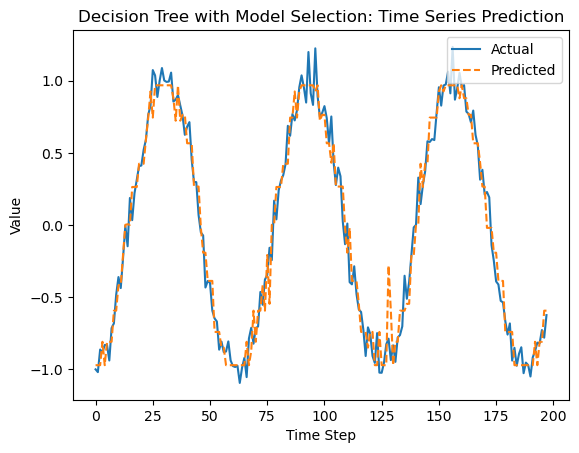

In [11]:
# Plot the actual vs. predicted values
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', linestyle='--')
plt.title('Decision Tree with Model Selection: Time Series Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()